In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Data Loading and Preprocessing

In [ ]:
df = pd.read_excel("/Users/anshmadan/Downloads/concrete+compressive+strength/Concrete_Data.xls")
print(df.head())
df.columns = [
    'Cement',
    'BlastFurnaceSlag',
    'FlyAsh',
    'Water',
    'Superplasticizer',
    'CoarseAggregate',
    'FineAggregate',
    'Age',
    'Strength'
]
print(df.isnull().sum())
print(df.describe())

   Cement  Blast Furnace Slag   Fly Ash  Water    Superplasticizer   \
0   540.0                  0.0      0.0    162.0                2.5   
1   540.0                  0.0      0.0    162.0                2.5   
2   332.5                142.5      0.0    228.0                0.0   
3   332.5                142.5      0.0    228.0                0.0   
4   198.6                132.4      0.0    192.0                0.0   

   Coarse Aggregate    Fine Aggregate   Age   Concrete compressive strength  
0              1040.0            676.0    28                      79.986111  
1              1055.0            676.0    28                      61.887366  
2               932.0            594.0   270                      40.269535  
3               932.0            594.0   365                      41.052780  
4               978.4            825.5   360                      44.296075  
Cement              0
BlastFurnaceSlag    0
FlyAsh              0
Water               0
Superplasticizer 

In [ ]:
X = df.drop('Strength', axis=1).values
y = df['Strength'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42
)

# Linear Regression

Linear Regression:
  MSE: 95.9755
  R^2: 0.6275


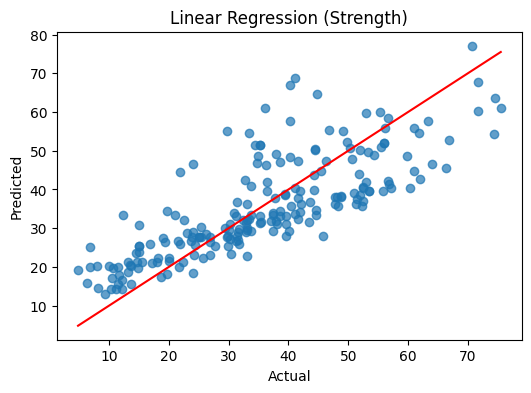

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_pred_lin = lin_reg.predict(X_test)
mse_lin = mean_squared_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("Linear Regression:")
print(f"  MSE: {mse_lin:.4f}")
print(f"  R^2: {r2_lin:.4f}")

plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred_lin, alpha=0.7)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color='red') 
plt.title("Linear Regression (Strength)")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.show()


# Polynomial Regression

Polynomial Regression (degree=2):
  MSE: 55.5899
  R^2: 0.7843


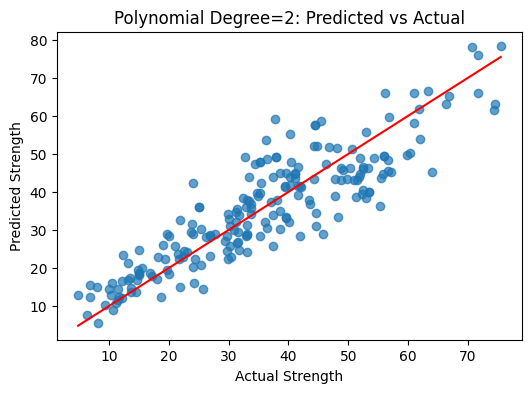

Polynomial Regression (degree=3):
  MSE: 40.2712
  R^2: 0.8437


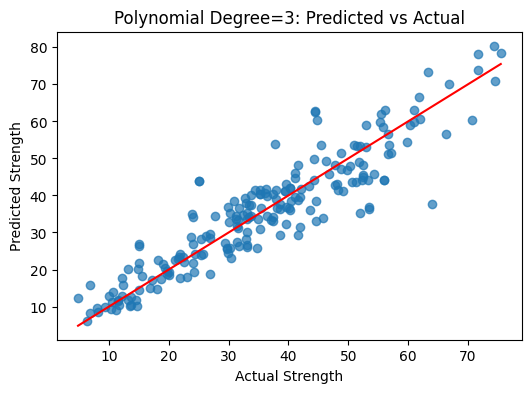

Polynomial Regression (degree=4):
  MSE: 677.3612
  R^2: -1.6287


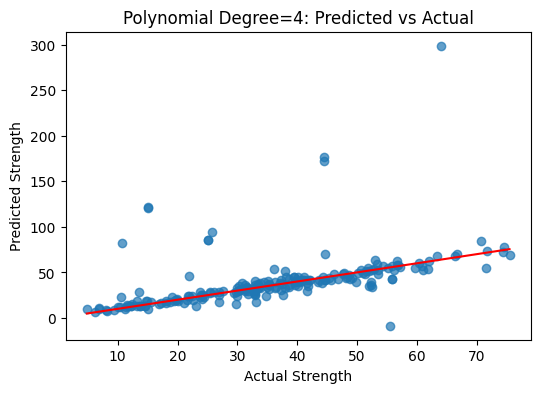

In [ ]:
degrees = [2, 3, 4]
mse_vals = []
r2_vals = []

for d in degrees:
    poly_transformer = PolynomialFeatures(degree=d, include_bias=False)
    X_train_poly = poly_transformer.fit_transform(X_train)
    X_test_poly = poly_transformer.transform(X_test)
    
    poly_reg = LinearRegression()
    poly_reg.fit(X_train_poly, y_train)
    
    y_pred_poly = poly_reg.predict(X_test_poly)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    
    mse_vals.append(mse_poly)
    r2_vals.append(r2_poly)
    
    print(f"Polynomial Regression (degree={d}):")
    print(f"  MSE: {mse_poly:.4f}")
    print(f"  R^2: {r2_poly:.4f}")
    
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred_poly, alpha=0.7)
    plt.plot([y_test.min(), y_test.max()],
             [y_test.min(), y_test.max()],
             color='red')
    plt.title(f"Polynomial Degree={d}: Predicted vs Actual")
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.show()


In [14]:
model_names = ["Linear", "Poly2", "Poly3", "Poly4"]
all_mse = [mse_lin] + mse_vals
all_r2 = [r2_lin] + r2_vals

for name, mse_val, r2_val in zip(model_names, all_mse, all_r2):
    print(f"{name} => MSE: {mse_val:.4f}, R^2: {r2_val:.4f}")


Linear => MSE: 95.9755, R^2: 0.6275
Poly2 => MSE: 55.5899, R^2: 0.7843
Poly3 => MSE: 40.2712, R^2: 0.8437
Poly4 => MSE: 677.3612, R^2: -1.6287


# Visualising Results with one feature

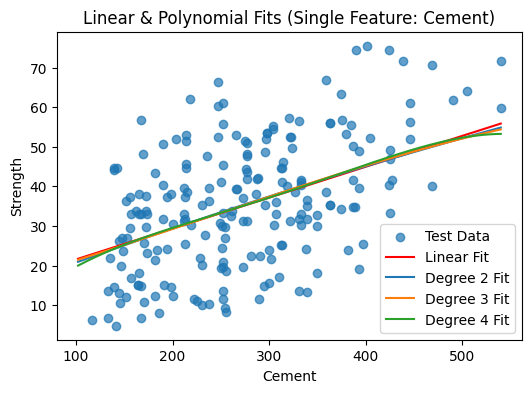

In [20]:
X_cement = df[['Cement']].values
y_strength = df['Strength'].values
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cement, y_strength, test_size=0.2, random_state=42
)

lin_reg_c = LinearRegression()
lin_reg_c.fit(X_train_c, y_train_c)

cement_range = np.linspace(X_cement.min(), X_cement.max(), 200).reshape(-1,1)
y_lin_plot = lin_reg_c.predict(cement_range)

plt.figure(figsize=(6,4))
plt.scatter(X_test_c, y_test_c, label='Test Data', alpha=0.7)

plt.plot(cement_range, y_lin_plot, color='red', label='Linear Fit')

for d in [2, 3, 4]:
    poly_feat = PolynomialFeatures(degree=d)
    X_train_c_poly = poly_feat.fit_transform(X_train_c)
    X_range_poly = poly_feat.transform(cement_range)
    
    poly_reg_c = LinearRegression()
    poly_reg_c.fit(X_train_c_poly, y_train_c)
    y_poly_plot = poly_reg_c.predict(X_range_poly)
    
    plt.plot(cement_range, y_poly_plot, label=f'Degree {d} Fit')
    
plt.title("Linear & Polynomial Fits (Single Feature: Cement)")
plt.xlabel("Cement")
plt.ylabel("Strength")
plt.legend()
plt.show()


# Bias Variance Tradeoff

The Linear model has a High bias and Low variance. 

It is undefitting the data with a moderately large MSE and it cannot deal with complex relations.

The undefitting indicates High Bias and the since it is linear, it will portray low Variance.

Polynomial Degree 2 and 3 perform similarly with lower MSE and slightly higher R^2 thus we can see that the models are able to deal with the complexity and thus have a lower bias. 

Thus Polynomial Degree 2 and 3 have a Low Bias and a moderate Variance. These models achieve a balance between bias and variance.

Polynomial Degree 4 has an extremely high MSE but a negative R^2 indicating that the model is highly overfitting in the training data and performing very poorly in the test data.

The model has a Low Bias but a very high Variance. This causes poor generalisation to new data but fits very well to training data. This model has low bias and high vairance. 

Higher Order Polynomials tend to overfit the data because they appear as very flexible and thus are also able to accomodate the noise in the data.

This means that the model also fits the overlying fluctuations. Thus the model becomes very sensitive to Variance. 

As higher order polynomials can capture complex realtions, they also dont generalise well to new data thus performing well on training data and worse on test data.